In [1]:
import cartopy.crs as ccrs
from cartopy.feature import LAND, COASTLINE
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from scipy.interpolate import RegularGridInterpolator

In [2]:
ds1 = Dataset('20200601_hr-nersc-MODEL-nextsimf-ARC-b20200602-fv00.0.nc')
siconc = ds1['siconc'][0][::-1]
ds1x = ds1['x'][:]
ds1y = ds1['y'][:][::-1]

ds1x, ds1y = np.meshgrid(ds1x, ds1y)
ds1_crs = ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=90)

In [3]:
ds2 = Dataset('ice_conc_nh_polstere-100_amsr2-tud_202006011200.nc')
ice_conc = ds2['ice_conc'][0]
ds2x = ds2['xc'][:] * 1000
ds2y = ds2['yc'][:] * 1000 

ds2x, ds2y = np.meshgrid(ds2x, ds2y)
ds2_crs = ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70)


In [4]:
ds1x2, ds1y2, ds1z2 = ds1_crs.transform_points(ds2_crs, ds2x, ds2y).T
rgi = RegularGridInterpolator((ds1y2[0][::-1], ds1x2.T[0]), ice_conc[::-1])
ds1_ice_conc = rgi((ds1y, ds1x))

ds1_ice_conc[ds1_ice_conc < 0] = np.nan
ds1_ice_conc /= 100

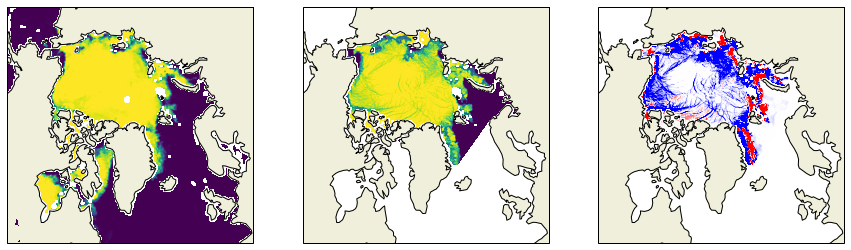

In [5]:
imgs = [ds1_ice_conc, siconc, siconc - ds1_ice_conc]
clims = [
    [0, 1],
    [0, 1],
    [-0.1, 0.1],
]
cmaps = [
    'viridis',
    'viridis',
    'bwr',
]

img_extent = [ds1x.min(), ds1x.max(), ds1y.min(), ds1y.max()]
figsize = (15,5)
fig, ax = plt.subplots(1,3, figsize=figsize, subplot_kw={'projection': ds1_crs})

for i in range(3):
    ax[i].imshow(imgs[i], clim=clims[i], cmap=cmaps[i], extent=img_extent, origin='upper')
    ax[i].add_feature(LAND)
    ax[i].add_feature(COASTLINE)
plt.show()